In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving ALSFRS_original.csv to ALSFRS_original.csv


In [ ]:
import io
alsfrs_orig = pd.read_csv(io.BytesIO(uploaded['ALSFRS_original.csv'])) 

In [ ]:
gastro = alsfrs_orig[['SubjectID', 'Q5b_Cutting_with_Gastrostomy', 'feature_delta']].sort_values(by=['SubjectID', 'feature_delta'], axis=0).reset_index().drop(columns='index')
gastro

,SubjectID,Q5b_Cutting_with_Gastrostomy,feature_delta
0,329,NaN,0
1,329,NaN,8
2,329,NaN,16
3,329,NaN,42
4,329,NaN,72
...,...,...,...
59255,999990,NaN,12
59256,999990,NaN,40
59257,999990,NaN,68
59258,999990,NaN,97


In [67]:
def checking_censored(x):
  
  if x.isnull().sum() == 0:
    return "Left censored"
  elif x.notnull().sum() == 0:
    return "Right censored"
  else:
    return "Normal"

aggs_by_col = {'Q5b_Cutting_with_Gastrostomy': [checking_censored], 'feature_delta': ['last']}
gastro_a = gastro.groupby('SubjectID', as_index=False).agg(aggs_by_col)
gastro_a

,SubjectID,Q5b_Cutting_with_Gastrostomy,feature_delta
,,checking_censored,last
0,329,Right censored,274
1,348,Right censored,401
2,533,Normal,378
3,586,Right censored,3
4,649,Normal,557
...,...,...,...
6505,999166,Right censored,390
6506,999482,Right censored,434
6507,999823,Left censored,184


In [69]:
#Subtract Left censored data

gastro_a.columns = ['SubjectID', 'checking_censored', 'last_feature_delta']
gastro_a = gastro_a[gastro_a['checking_censored'] != 'Left censored']
full_extent = list(gastro_a['SubjectID'])
Right_censored_extent = list(gastro_a[gastro_a['checking_censored'] == 'Right censored']['SubjectID'])
Normal_extent = list(gastro_a[gastro_a['checking_censored'] == 'Normal']['SubjectID'])

print("Total number is " + str(len(full_extent)))
print("There are " + str(len(Right_censored_extent)) + " right censored data")
print("There are " + str(len(Normal_extent)) + " normal data")


Total number is 5797
There are 4609 right censored data
There are 1188 normal data


In [70]:
# Create gastro_event_0

gastro_event_0 = gastro_a[gastro_a['checking_censored'] == 'Right censored']
gastro_event_0 = gastro_event_0.replace({'checking_censored':{'Right censored': 0}})
gastro_event_0.columns = ['SubjectID', 'status', 'time']
gastro_event_0

,SubjectID,status,time
0,329,0,274
1,348,0,401
3,586,0,3
5,708,0,231
11,2416,0,2
...,...,...,...
6504,998908,0,560
6505,999166,0,390
6506,999482,0,434
6508,999880,0,266


In [71]:
gastro_b = gastro.copy()
gastro_b.query("SubjectID == {0}".format(Normal_extent), inplace=True)
gastro_b = gastro_b.dropna(axis=0)
gastro_event_1 = pd.DataFrame(gastro_b.groupby('SubjectID')['feature_delta'].agg('first')).reset_index()
gastro_event_1.columns = ['SubjectID', 'time']
gastro_event_1['status'] = 1
gastro_event_1

,SubjectID,time,status
0,533,287,1
1,649,487,1
2,1064,0,1
3,1234,245,1
4,1736,0,1
...,...,...,...
1183,995893,175,1
1184,996401,420,1
1185,996711,379,1
1186,998047,551,1


In [72]:
gastro_event_1 = gastro_event_1[gastro_event_1['time'] != 0]
gastro_event_1

,SubjectID,time,status
0,533,287,1
1,649,487,1
3,1234,245,1
5,3551,501,1
6,4803,98,1
...,...,...,...
1183,995893,175,1
1184,996401,420,1
1185,996711,379,1
1186,998047,551,1


In [76]:
gastro_fin = pd.concat([gastro_event_1, gastro_event_0]).sort_values(by='SubjectID', axis=0)
gastro_fin = gastro_fin.reset_index().drop(columns = 'index')

In [77]:
from google.colab import files 
uploaded = files.upload()

Saving feat_n_targ_without_nans_optimal.csv to feat_n_targ_without_nans_optimal.csv
Saving Optimal Gastrostomy.csv to Optimal Gastrostomy.csv


In [78]:
import io
feature = pd.read_csv(io.BytesIO(uploaded['feat_n_targ_without_nans_optimal.csv'])) 
optimal_gastro = pd.read_csv(io.BytesIO(uploaded['Optimal Gastrostomy.csv'])) 

In [80]:
feature.drop(columns = 'Unnamed: 0')

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,mean_alsfrs_total,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,mean_Bulbar,mean_motor,slope_alsfrs_tot,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_to_gas,status
0,329.0,38.0,0.0,-1068.0,-1706.0,0.0,638.0,0.048171,101.250000,27.900000,4.000000,3.000000,4.000000,3.000000,1.90,3.000000,2.600000,2.0,1.200000,3.200000,8.000000,13.700000,0.041667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.013889,0.000000,0.013889,0.000000,0.000000,0.041667,72.0,1.0
1,708.0,46.0,1.0,-986.0,-1070.0,1.0,84.0,-0.061928,51.000000,32.250000,3.000000,2.833333,2.666667,3.166667,3.75,3.166667,4.000000,4.0,2.833333,2.833333,5.666667,20.916667,-0.021978,0.000000,-0.010989,-0.010989,0.000000,0.0,0.010989,0.000000,0.000000,0.000000,-0.010989,-0.010989,0.010989,35.0,1.0
2,902.0,77.0,0.0,-49.0,-514.0,0.0,465.0,-0.041707,89.600000,32.250000,4.000000,3.750000,3.250000,4.000000,4.00,2.750000,4.000000,2.5,1.000000,3.000000,7.250000,18.250000,-0.035714,0.000000,0.000000,0.011905,0.000000,0.0,-0.023810,0.023810,-0.011905,0.000000,-0.011905,0.011905,-0.035714,154.0,0.0
3,1736.0,41.0,1.0,-511.0,-570.0,0.0,59.0,0.000000,71.000000,16.500000,2.500000,3.000000,3.000000,1.500000,1.00,1.000000,0.500000,0.5,0.000000,3.500000,5.500000,4.500000,-0.104167,-0.020833,-0.041667,0.000000,-0.020833,0.0,0.000000,-0.020833,-0.020833,0.000000,0.020833,-0.020833,-0.062500,48.0,1.0
4,2492.0,63.0,1.0,-209.0,-365.0,0.0,156.0,-0.235294,114.000000,30.000000,4.000000,4.000000,4.000000,3.000000,3.00,2.000000,3.000000,3.0,1.000000,3.000000,8.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,401.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,998542.0,70.0,1.0,-73.0,-287.0,0.0,214.0,0.000000,85.000000,27.500000,4.000000,3.000000,4.000000,4.000000,3.00,2.000000,2.000000,2.0,1.000000,2.500000,8.000000,14.000000,-0.125000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-0.125000,0.000000,0.000000,21.0,0.0
2324,998756.0,64.0,1.0,-241.0,-612.0,1.0,371.0,-0.255102,73.333333,29.333333,2.666667,2.666667,3.000000,3.000000,3.00,3.000000,4.000000,3.0,3.000000,2.000000,5.666667,19.000000,-0.017544,0.000000,-0.017544,0.000000,0.000000,0.0,0.000000,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,35.0,1.0
2325,999823.0,55.0,1.0,-84.0,-492.0,0.0,408.0,-0.025981,100.800000,35.250000,2.750000,3.000000,2.750000,4.000000,3.75,3.000000,4.000000,4.0,4.000000,4.000000,5.500000,22.750000,-0.024390,-0.012195,0.000000,-0.012195,0.000000,0.0,0.000000,0.012195,0.000000,0.000000,0.000000,-0.024390,0.000000,91.0,1.0
2326,999880.0,51.0,1.0,-2105.0,-2865.0,0.0,760.0,-0.079112,50.250000,24.200000,4.000000,4.000000,4.000000,2.000000,1.00,0.400000,2.800000,2.0,0.000000,4.000000,8.000000,8.200000,0.014286,0.000000,0.000000,0.000000,0.000000,0.0,0.014286,0.028571,0.000000,0.000000,0.000000,0.000000,0.014286,266.0,0.0


In [81]:
extent = list(gastro_fin['SubjectID'])
feature.query("SubjectID == {0}".format(extent), inplace=True)
feature

,Unnamed: 0,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,mean_alsfrs_total,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,mean_Bulbar,mean_motor,slope_alsfrs_tot,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_to_gas,status
0,0,329.0,38.0,0.0,-1068.0,-1706.0,0.0,638.0,0.048171,101.250000,27.900000,4.000000,3.000000,4.000000,3.000000,1.90,3.000000,2.600000,2.0,1.200000,3.200000,8.000000,13.700000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000,0.013889,0.000000,0.000000,0.041667,72.0,1.0
1,1,708.0,46.0,1.0,-986.0,-1070.0,1.0,84.0,-0.061928,51.000000,32.250000,3.000000,2.833333,2.666667,3.166667,3.75,3.166667,4.000000,4.0,2.833333,2.833333,5.666667,20.916667,-0.021978,0.000000,-0.010989,-0.010989,0.000000,0.000000,0.010989,0.000000,0.000000,0.000000,-0.010989,-0.010989,0.010989,35.0,1.0
4,4,2492.0,63.0,1.0,-209.0,-365.0,0.0,156.0,-0.235294,114.000000,30.000000,4.000000,4.000000,4.000000,3.000000,3.00,2.000000,3.000000,3.0,1.000000,3.000000,8.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,401.0,0.0
5,5,3971.0,55.0,0.0,-378.0,-763.0,0.0,385.0,-0.142857,86.000000,30.000000,4.000000,4.000000,4.000000,4.000000,4.00,2.000000,3.000000,1.0,0.000000,4.000000,8.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,182.0,1.0
6,6,3981.0,62.0,1.0,-90.0,-210.0,0.0,120.0,-0.535109,99.500000,24.600000,3.600000,3.700000,3.600000,2.800000,2.60,1.100000,2.000000,1.2,0.000000,4.000000,7.200000,9.700000,-0.142857,-0.014286,0.014286,-0.014286,-0.014286,-0.028571,-0.028571,0.014286,-0.028571,0.000000,0.000000,-0.028571,-0.128571,70.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,2322,998519.0,42.0,0.0,-475.0,-653.0,0.0,178.0,-0.015745,67.000000,26.750000,4.000000,4.000000,4.000000,2.500000,2.75,2.375000,2.125000,1.0,0.000000,4.000000,8.000000,10.750000,-0.068966,0.000000,0.000000,0.000000,-0.022989,-0.011494,-0.011494,-0.011494,0.000000,0.000000,0.000000,0.000000,-0.068966,280.0,0.0
2323,2323,998542.0,70.0,1.0,-73.0,-287.0,0.0,214.0,0.000000,85.000000,27.500000,4.000000,3.000000,4.000000,4.000000,3.00,2.000000,2.000000,2.0,1.000000,2.500000,8.000000,14.000000,-0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.125000,0.000000,0.000000,21.0,0.0
2324,2324,998756.0,64.0,1.0,-241.0,-612.0,1.0,371.0,-0.255102,73.333333,29.333333,2.666667,2.666667,3.000000,3.000000,3.00,3.000000,4.000000,3.0,3.000000,2.000000,5.666667,19.000000,-0.017544,0.000000,-0.017544,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,35.0,1.0
2326,2326,999880.0,51.0,1.0,-2105.0,-2865.0,0.0,760.0,-0.079112,50.250000,24.200000,4.000000,4.000000,4.000000,2.000000,1.00,0.400000,2.800000,2.0,0.000000,4.000000,8.000000,8.200000,0.014286,0.000000,0.000000,0.000000,0.000000,0.000000,0.014286,0.028571,0.000000,0.000000,0.000000,0.000000,0.014286,266.0,0.0


In [86]:
gastro_fin.columns = ['SubjectID', 'time_to_real_gas', 'real_status']
feature = feature.merge(gastro_fin, on='SubjectID')

In [87]:
feature

,Unnamed: 0,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,mean_alsfrs_total,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,mean_Bulbar,mean_motor,slope_alsfrs_tot,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_to_gas,status,time_to_real_gas,real_status
0,0,329.0,38.0,0.0,-1068.0,-1706.0,0.0,638.0,0.048171,101.250000,27.900000,4.000000,3.000000,4.000000,3.000000,1.90,3.000000,2.600000,2.0,1.200000,3.200000,8.000000,13.700000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000,0.013889,0.000000,0.000000,0.041667,72.0,1.0,274,0
1,1,708.0,46.0,1.0,-986.0,-1070.0,1.0,84.0,-0.061928,51.000000,32.250000,3.000000,2.833333,2.666667,3.166667,3.75,3.166667,4.000000,4.0,2.833333,2.833333,5.666667,20.916667,-0.021978,0.000000,-0.010989,-0.010989,0.000000,0.000000,0.010989,0.000000,0.000000,0.000000,-0.010989,-0.010989,0.010989,35.0,1.0,231,0
2,4,2492.0,63.0,1.0,-209.0,-365.0,0.0,156.0,-0.235294,114.000000,30.000000,4.000000,4.000000,4.000000,3.000000,3.00,2.000000,3.000000,3.0,1.000000,3.000000,8.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,401.0,0.0,401,0
3,5,3971.0,55.0,0.0,-378.0,-763.0,0.0,385.0,-0.142857,86.000000,30.000000,4.000000,4.000000,4.000000,4.000000,4.00,2.000000,3.000000,1.0,0.000000,4.000000,8.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,182.0,1.0,378,0
4,6,3981.0,62.0,1.0,-90.0,-210.0,0.0,120.0,-0.535109,99.500000,24.600000,3.600000,3.700000,3.600000,2.800000,2.60,1.100000,2.000000,1.2,0.000000,4.000000,7.200000,9.700000,-0.142857,-0.014286,0.014286,-0.014286,-0.014286,-0.028571,-0.028571,0.014286,-0.028571,0.000000,0.000000,-0.028571,-0.128571,70.0,0.0,70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,2322,998519.0,42.0,0.0,-475.0,-653.0,0.0,178.0,-0.015745,67.000000,26.750000,4.000000,4.000000,4.000000,2.500000,2.75,2.375000,2.125000,1.0,0.000000,4.000000,8.000000,10.750000,-0.068966,0.000000,0.000000,0.000000,-0.022989,-0.011494,-0.011494,-0.011494,0.000000,0.000000,0.000000,0.000000,-0.068966,280.0,0.0,280,0
1899,2323,998542.0,70.0,1.0,-73.0,-287.0,0.0,214.0,0.000000,85.000000,27.500000,4.000000,3.000000,4.000000,4.000000,3.00,2.000000,2.000000,2.0,1.000000,2.500000,8.000000,14.000000,-0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.125000,0.000000,0.000000,21.0,0.0,8,0
1900,2324,998756.0,64.0,1.0,-241.0,-612.0,1.0,371.0,-0.255102,73.333333,29.333333,2.666667,2.666667,3.000000,3.000000,3.00,3.000000,4.000000,3.0,3.000000,2.000000,5.666667,19.000000,-0.017544,0.000000,-0.017544,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,35.0,1.0,64,0
1901,2326,999880.0,51.0,1.0,-2105.0,-2865.0,0.0,760.0,-0.079112,50.250000,24.200000,4.000000,4.000000,4.000000,2.000000,1.00,0.400000,2.800000,2.0,0.000000,4.000000,8.000000,8.200000,0.014286,0.000000,0.000000,0.000000,0.000000,0.000000,0.014286,0.028571,0.000000,0.000000,0.000000,0.000000,0.014286,266.0,0.0,266,0


In [88]:
data = feature.copy()
y = data[['real_status']]

In [95]:
feat_list = ['Age', 'Gender', 'onset_site',
       'diag_minus_onset',
       'fvc_slope', 'fvc_mean',  'mean_Q10_Respiratory',
       'mean_Bulbar', 'mean_motor', 'slope_Q1_Speech', 'slope_Q2_Salivation',
       'slope_Q3_Swallowing', 'slope_Q4_Handwriting', 'slope_Q5_Cutting',
       'slope_Q6_Dressing_and_Hygiene', 'slope_Q7_Turning_in_Bed',
       'slope_Q8_Walking', 'slope_Q9_Climbing_Stairs', 'slope_Q10_Respiratory', 'time_to_real_gas', 'real_status'
       ]

In [99]:
from sklearn.model_selection import train_test_split

df_train, df_test, y_train, y_test = train_test_split(data[feat_list], y, train_size=0.8, test_size=0.2, random_state=11)

In [96]:
!pip install lifelines

     |████████████████████████████████| 348kB 7.5MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-cp37-none-any.whl size=4035 sha256=ff545b3b10b88898ea22e3b9fd1429070ad7d41b538a6a5c98d006bb57540eca
  Stored in directory: /root/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
Successfully built autograd-gamma


In [97]:
from lifelines import CoxPHFitter

In [100]:
cph = CoxPHFitter(penalizer=0.01)
cph.fit(df_train, 'time_to_real_gas', event_col='real_status')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1522 total observations, 1354 right-censored observations>
             duration col = 'time_to_real_gas'
                event col = 'real_status'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1522
number of events observed = 168
   partial log-likelihood = -1020.20
         time fit was run = 2021-05-13 11:58:41 UTC

---
                                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                             
Age                             0.02       1.02       0.01             0.00             0.03                 1.00                 1.03
Gender                         -0.29       0.75       0.16            -0.60             0.01                 0.55                 1.01
onset_site                      0.78       2.18       0.23             0.32             1.24                 1.38                 3.44
diag_minus_onset               -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
fvc_slope                      -0.39       0.68       0.21            -0.81             0.03                 0.45                 1.03
fvc_mean                       -0.02       0.98       0.00            -0.03            -0.01                 0.97                 0.99
mean_Q10_Respiratory           -0.06       0.94       0.14            -0.34             0.22                 0.71                 1.24
mean_Bulbar                    -0.57       0.57       0.09            -0.75            -0.39                 0.47                 0.68
mean_motor                     -0.05       0.95       0.02            -0.09            -0.02                 0.92                 0.98
slope_Q1_Speech                -4.25       0.01       4.63           -13.33             4.82                 0.00               124.21
slope_Q2_Salivation           -10.48       0.00       4.74           -19.76            -1.20                 0.00                 0.30
slope_Q3_Swallowing            -0.32       0.73       4.98           -10.08             9.45                 0.00             12665.95
slope_Q4_Handwriting            4.74     114.17       3.69            -2.49            11.97                 0.08             1.57e+05
slope_Q5_Cutting               -1.69       0.18       4.99           -11.47             8.09                 0.00              3271.01
slope_Q6_Dressing_and_Hygiene  -3.94       0.02       4.14           -12.05             4.16                 0.00                64.36
slope_Q7_Turning_in_Bed         0.28       1.32       2.35            -4.32             4.88                 0.01               131.31
slope_Q8_Walking               -3.72       0.02       5.55           -14.60             7.15                 0.00              1276.19
slope_Q9_Climbing_Stairs       -5.47       0.00       2.81           -10.98             0.05                 0.00                 1.05
slope_Q10_Respiratory          -3.78       0.02       4.34           -12.28             4.72                 0.00               112.11

                                  z      p   -log2(p)
covariate                                            
Age                            2.26   0.02       5.38
Gender                        -1.87   0.06       4.03
onset_site                     3.34 <0.005      10.20
diag_minus_onset              -0.75   0.45       1.14
fvc_slope                     -1.82   0.07       3.87
fvc_mean                      -3.23 <0.005       9.64
mean_Q10_Respiratory          -0.44   0.66       0.60
mean_Bulbar                   -6.30 <0.005      31.63
mean_motor                    -3.13 <0.005       9.14
slope_Q1_Speech               -0.92   0.36       1.48
slope_Q2_Salivation           -2.21   0.03       5.21
slope_Q3_Swallowin

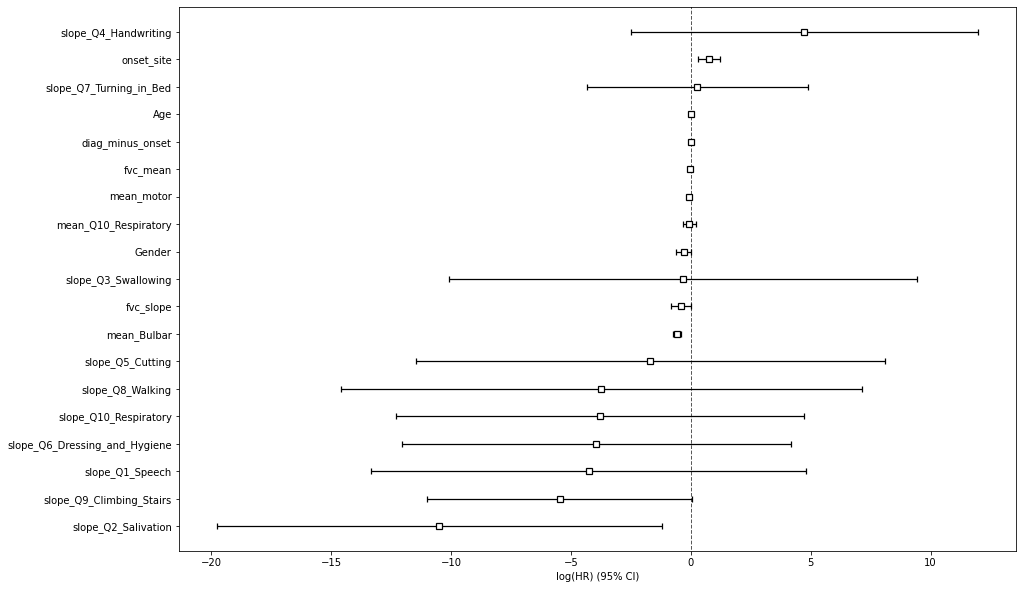

In [101]:
plt.figure(figsize=(15,10))
cph.plot()
#HR >1, 즉 log(HR)>0 이면 사망 위험 증가를 뜻함

In [102]:
from lifelines.utils import k_fold_cross_validation

In [104]:
import inspect
inspect.getargspec(k_fold_cross_validation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  


ArgSpec(args=['fitters', 'df', 'duration_col', 'event_col', 'k', 'scoring_method', 'fitter_kwargs'], varargs=None, keywords=None, defaults=(None, 5, 'log_likelihood', {}))

In [105]:
cph = CoxPHFitter()
C_Idx = np.array([])
random_num_list = [10,20,30,40,50,60,70,80,90,100]

for i in random_num_list:
    arr = k_fold_cross_validation(cph, df_train, 'time_to_real_gas', event_col='real_status', k=5, scoring_method="concordance_index")
    C_Idx = np.concatenate((C_Idx, arr))
print(C_Idx)

[0.77456034 0.6995453  0.8213982  0.79901961 0.76723789 0.83507338
 0.81197642 0.73609707 0.7703209  0.69004329 0.75049792 0.73023897
 0.80232558 0.74472916 0.81157    0.76061776 0.75886179 0.76040477
 0.75825672 0.83026521 0.74949833 0.7754561  0.75766822 0.80377189
 0.77256759 0.75403408 0.81100552 0.72981316 0.77647275 0.82159955
 0.7824958  0.73910534 0.70343766 0.79974851 0.789516   0.72618863
 0.78656069 0.8023511  0.73618538 0.79918564 0.77614353 0.68258908
 0.82605328 0.74667848 0.83682008 0.71356858 0.81436497 0.78002569
 0.74314828 0.80454201]


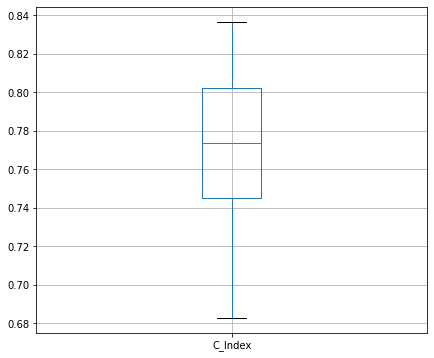

In [106]:
df = pd.DataFrame(C_Idx)
df.columns = ['C_Index']

plt.figure(figsize=(7,6))
boxplot = df.boxplot(column=['C_Index'])
plt.show()

ICI =  0.028863254990613034
E50 =  0.028986660126170127


(<matplotlib.axes._subplots.AxesSubplot at 0x7f884266bc10>,
 0.028863254990613034,
 0.028986660126170127)

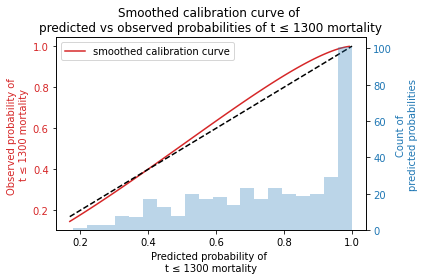

In [166]:
from lifelines.calibration import survival_probability_calibration

survival_probability_calibration(cph, df_test, t0=1300)

In [167]:
feature1 = feature.copy()
feature1 = feature1[(feature1['status']== 1)]
feature1 = feature1[(feature1['real_status']== 1)]
feature1['real_minus_optimal_gas_time'] = feature1['time_to_real_gas']-feature1['time_to_gas']
feature1.describe()

,Unnamed: 0,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,mean_alsfrs_total,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,mean_Bulbar,mean_motor,slope_alsfrs_tot,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_to_gas,status,time_to_real_gas,real_status,real_minus_optimal_gas_time
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.00000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.0,180.000000,180.0,180.000000
mean,1099.200000,479529.972222,56.127778,0.538889,-221.477778,-524.305556,0.288889,302.827778,-0.150850,77.597870,28.101204,3.054352,3.331296,3.281620,2.872870,2.453102,2.346944,2.887546,2.51500,1.825556,3.532917,6.335972,14.901019,-0.043389,-0.005413,-0.005836,-0.003564,-0.002591,-0.002352,-0.004738,0.015828,-0.004083,-0.008929,-0.002814,-0.008977,-0.025761,147.422222,1.0,240.344444,1.0,92.922222
std,671.630488,292327.054543,11.036775,0.499876,220.675232,394.273876,0.454510,275.570142,0.301652,14.949951,5.696054,0.581921,0.566953,0.563592,1.159765,1.294865,1.163576,1.101540,0.98547,1.345712,0.521349,0.990345,5.840006,0.068854,0.014705,0.017778,0.015003,0.016605,0.017459,0.020224,0.034648,0.012918,0.021382,0.018816,0.023919,0.047037,103.517680,0.0,109.760803,0.0,134.901597
min,11.000000,6786.000000,30.000000,0.000000,-1566.000000,-4274.000000,0.000000,0.000000,-1.500000,47.666667,14.500000,1.500000,1.000000,1.333333,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.333333,3.500000,1.500000,-0.442308,-0.111111,-0.100000,-0.076923,-0.071429,-0.071429,-0.125000,-0.076923,-0.083333,-0.125000,-0.076923,-0.153846,-0.250000,12.000000,1.0,2.000000,1.0,-682.000000
25%,521.500000,233366.750000,47.750000,0.000000,-299.500000,-629.000000,0.000000,153.750000,-0.246412,67.875000,23.666667,2.750000,3.000000,3.000000,2.500000,1.187500,1.500000,2.000000,2.00000,1.000000,3.000000,5.787500,11.000000,-0.079410,-0.011800,-0.014085,0.000000,0.000000,-0.002747,-0.011905,0.000000,0.000000,-0.014391,0.000000,-0.015873,-0.043956,70.750000,1.0,172.000000,1.0,0.000000
50%,1054.000000,459803.000000,58.500000,1.000000,-158.000000,-448.500000,0.000000,245.500000,-0.125992,75.533333,29.000000,3.000000,3.333333,3.000000,3.000000,2.750000,2.500000,3.000000,2.12500,1.500000,3.666667,6.000000,15.625000,-0.036725,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.022739,120.500000,1.0,262.500000,1.0,110.000000
75%,1666.500000,723482.500000,64.000000,1.000000,-79.000000,-301.750000,1.000000,368.000000,-0.033789,87.000000,32.500000,3.333333,4.000000,4.000000,4.000000,3.666667,3.000000,4.000000,3.25000,3.000000,4.000000,7.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018959,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,1.0,313.250000,1.0,178.250000
max,2304.000000,992110.000000,82.000000,1.000000,-1.000000,-84.000000,1.000000,2708.000000,1.375000,121.666667,38.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,8.000000,24.000000,0.250000,0.047619,0.125000,0.111111,0.125000,0.125000,0.125000,0.250000,0.020833,0.071429,0.111111,0.111111,0.142857,688.000000,1.0,468.000000,1.0,399.000000


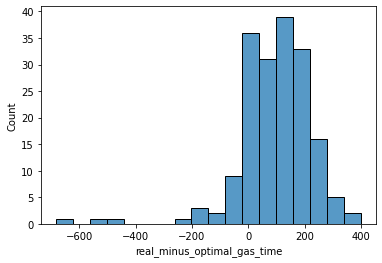

In [173]:
sns.histplot(x=feature1['real_minus_optimal_gas_time'])

In [125]:
from google.colab import files 
uploaded = files.upload()

Saving survival.csv to survival.csv


In [146]:
import io
surv = pd.read_csv(io.BytesIO(uploaded['survival.csv']))

In [168]:
feature_early =  feature1[(feature1['real_minus_optimal_gas_time']< 0) ] 
feature_medium =  feature1[(feature1['real_minus_optimal_gas_time']>= 0)]
feature_medium =  feature_medium[(feature_medium['real_minus_optimal_gas_time']< 178.25)]
feature_late =  feature1[(feature1['real_minus_optimal_gas_time']>178.25) ] 

In [169]:
early_list = list(feature_early['SubjectID'])
medium_list = list(feature_medium['SubjectID'])
late_list = list(feature_late['SubjectID'])

In [170]:
surv_early = surv.copy()
surv_medium = surv.copy()
surv_late = surv.copy()



In [171]:
surv_early.query("SubjectID == {0}".format(early_list), inplace=True)
surv_medium.query("SubjectID == {0}".format(medium_list), inplace=True)
surv_late.query("SubjectID == {0}".format(late_list), inplace=True)

In [159]:
from lifelines import KaplanMeierFitter

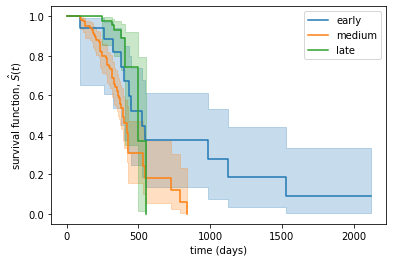

In [172]:
kmf = KaplanMeierFitter()
kmf.fit(surv_early["time_event"], surv_early["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_medium["time_event"], surv_medium["status"], label="medium")
ax_kmf = kmf.plot(ax=ax_kmf)
kmf.fit(surv_late["time_event"], surv_late["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
ax_kmf

In [161]:
from lifelines.statistics import logrank_test
logrank_test(surv_early["time_event"], surv_late["time_event"], surv_early["status"], surv_late["status"]).p_value

0.655886132736475

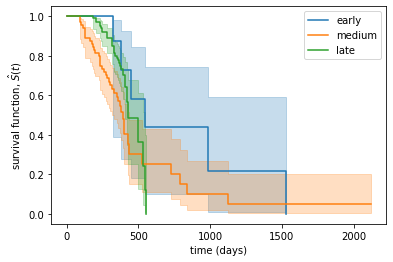

In [176]:
feature_early2 =  feature1[(feature1['real_minus_optimal_gas_time']< -90) ] 
feature_medium2 =  feature1[(feature1['real_minus_optimal_gas_time']>= -90)]
feature_medium2 =  feature_medium2[(feature_medium2['real_minus_optimal_gas_time']< 90)]
feature_late2 =  feature1[(feature1['real_minus_optimal_gas_time']>=90) ] 

early_list2 = list(feature_early2['SubjectID'])
medium_list2 = list(feature_medium2['SubjectID'])
late_list2 = list(feature_late2['SubjectID'])

surv_early = surv.copy()
surv_medium = surv.copy()
surv_late = surv.copy()

surv_early.query("SubjectID == {0}".format(early_list2), inplace=True)
surv_medium.query("SubjectID == {0}".format(medium_list2), inplace=True)
surv_late.query("SubjectID == {0}".format(late_list2), inplace=True)

kmf = KaplanMeierFitter()
kmf.fit(surv_early["time_event"], surv_early["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_medium["time_event"], surv_medium["status"], label="medium")
ax_kmf = kmf.plot(ax=ax_kmf)
kmf.fit(surv_late["time_event"], surv_late["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
ax_kmf

In [177]:
logrank_test(surv_early["time_event"], surv_late["time_event"], surv_early["status"], surv_late["status"]).p_value

0.10101867310828332

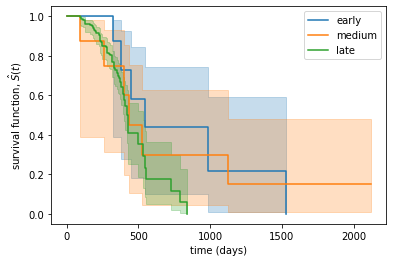

In [179]:
feature_early3 =  feature1[(feature1['real_minus_optimal_gas_time']< -90) ] 
feature_medium3 =  feature1[(feature1['real_minus_optimal_gas_time']>= -90)]
feature_medium3 =  feature_medium3[(feature_medium3['real_minus_optimal_gas_time']< 0)]
feature_late3 =  feature1[(feature1['real_minus_optimal_gas_time']>=0) ] 

early_list3 = list(feature_early3['SubjectID'])
medium_list3 = list(feature_medium3['SubjectID'])
late_list3 = list(feature_late3['SubjectID'])

surv_early = surv.copy()
surv_medium = surv.copy()
surv_late = surv.copy()

surv_early.query("SubjectID == {0}".format(early_list3), inplace=True)
surv_medium.query("SubjectID == {0}".format(medium_list3), inplace=True)
surv_late.query("SubjectID == {0}".format(late_list3), inplace=True)

kmf = KaplanMeierFitter()
kmf.fit(surv_early["time_event"], surv_early["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_medium["time_event"], surv_medium["status"], label="medium")
ax_kmf = kmf.plot(ax=ax_kmf)
kmf.fit(surv_late["time_event"], surv_late["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
ax_kmf

In [183]:
logrank_test(surv_early["time_event"], surv_late["time_event"], surv_early["status"], surv_late["status"]).p_value

0.03641437026500763

In [190]:
feature2 = feature.copy()
feature2 = feature2[(feature2['status'] == 1) & (feature2['real_status'] == 0)]
add_late_list = list(feature2['SubjectID'])
feature3 = feature.copy()
feature3 = feature3[(feature3['status'] == 0) & (feature3['real_status'] == 1)]
add_early_list = list(feature3['SubjectID'])
print(len(add_late_list))
print(len(add_early_list))
print(len(early_list3))
print(len(medium_list3))
print(len(late_list3))


670
21
9
9
162


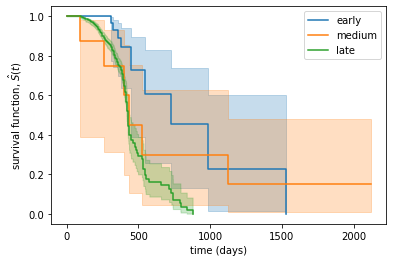

In [188]:
feature_early4 =  feature1[(feature1['real_minus_optimal_gas_time']< -90) ] 
feature_medium4 =  feature1[(feature1['real_minus_optimal_gas_time']>= -90) & (feature1['real_minus_optimal_gas_time']< 0)]
feature_late4 =  feature1[(feature1['real_minus_optimal_gas_time']>=0) ] 

early_list4 = list(feature_early4['SubjectID']) + add_early_list
medium_list4 = list(feature_medium4['SubjectID'])
late_list4 = list(feature_late4['SubjectID']) + add_late_list

surv_early = surv.copy()
surv_medium = surv.copy()
surv_late = surv.copy()

surv_early.query("SubjectID == {0}".format(early_list4), inplace=True)
surv_medium.query("SubjectID == {0}".format(medium_list4), inplace=True)
surv_late.query("SubjectID == {0}".format(late_list4), inplace=True)

kmf = KaplanMeierFitter()
kmf.fit(surv_early["time_event"], surv_early["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_medium["time_event"], surv_medium["status"], label="medium")
ax_kmf = kmf.plot(ax=ax_kmf)
kmf.fit(surv_late["time_event"], surv_late["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
ax_kmf

In [189]:
logrank_test(surv_early["time_event"], surv_late["time_event"], surv_early["status"], surv_late["status"]).p_value

0.0006304765576602621

In [197]:
validate_add_late = feature2[['SubjectID','time_to_gas', 'time_to_real_gas']]
validate_add_late['real(0)-optimal(1)'] = validate_add_late['time_to_real_gas'] - validate_add_late['time_to_gas']
validate_add_late = validate_add_late[validate_add_late['real(0)-optimal(1)']<0]
validate_add_late

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SubjectID,time_to_gas,time_to_real_gas,real(0)-optimal(1)
444,240579.0,49.0,8,-41.0
1816,963634.0,100.0,72,-28.0


In [204]:
remove_early_list = [240579.0, 963634.0]

In [201]:
validate_add_early = feature3[['SubjectID','time_to_gas', 'time_to_real_gas']]
validate_add_early['optimal(0)-real(1)'] = validate_add_early['time_to_gas'] - validate_add_early['time_to_real_gas']
validate_add_early

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SubjectID,time_to_gas,time_to_real_gas,optimal(0)-real(1)
73,36997.0,376.0,376,0.0
121,62767.0,376.0,376,0.0
190,103126.0,399.0,147,252.0
208,111495.0,392.0,90,302.0
239,123794.0,122.0,95,27.0
282,147061.0,381.0,259,122.0
331,169905.0,378.0,378,0.0
340,173029.0,378.0,252,126.0
449,246110.0,399.0,73,326.0
516,283642.0,392.0,119,273.0


In [202]:
validate_add_early = validate_add_early[validate_add_early['optimal(0)-real(1)']<0]
validate_add_early

,SubjectID,time_to_gas,time_to_real_gas,optimal(0)-real(1)


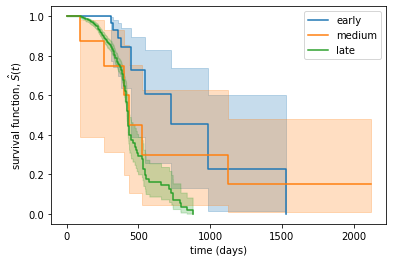

In [205]:
feature_early5 =  feature1[(feature1['real_minus_optimal_gas_time']< -90) ] 
feature_medium5 =  feature1[(feature1['real_minus_optimal_gas_time']>= -90) & (feature1['real_minus_optimal_gas_time']< 0)]
feature_late5 =  feature1[(feature1['real_minus_optimal_gas_time']>=0) ] 

early_list5 = list(feature_early5['SubjectID']) + add_early_list
medium_list5 = list(feature_medium5['SubjectID'])
late_list5 = list(feature_late5['SubjectID']) + add_late_list 
late_list5 = list(set(late_list5) - set(remove_early_list))

surv_early = surv.copy()
surv_medium = surv.copy()
surv_late = surv.copy()

surv_early.query("SubjectID == {0}".format(early_list5), inplace=True)
surv_medium.query("SubjectID == {0}".format(medium_list5), inplace=True)
surv_late.query("SubjectID == {0}".format(late_list5), inplace=True)

kmf = KaplanMeierFitter()
kmf.fit(surv_early["time_event"], surv_early["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_medium["time_event"], surv_medium["status"], label="medium")
ax_kmf = kmf.plot(ax=ax_kmf)
kmf.fit(surv_late["time_event"], surv_late["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
ax_kmf

In [206]:
logrank_test(surv_early["time_event"], surv_late["time_event"], surv_early["status"], surv_late["status"]).p_value

0.0006422791164293264